In [48]:
import pickle
import cv2 
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [49]:
# Load the saved model
with open('model.pkl', 'rb') as file:
   loaded_model = pickle.load(file)

In [50]:
hog_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
print(hog_face_cascade)
lbp_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'lbpcascade_frontalface.xml')
print(lbp_face_cascade)

< cv2.CascadeClassifier 00000186A1B1B850>
< cv2.CascadeClassifier 00000186A1A93DB0>


In [51]:

# in this step we should receive a video and then we should extract picture and then checking
# capture frames from a camera
cap = cv2.VideoCapture(0)
  
# loop runs if capturing has been initialized.
while 1: 
  
    # reads frames from a camera
    ret, image = cap.read() 
  
    # convert to gray scale of each frames
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    # Detects faces of different sizes in the input image
    faces = hog_face_cascade.detectMultiScale(gray, 1.3, 5)
  
    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2) 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
  
    # Display an image in a window
    cv2.imshow('image', image)
  
    # Wait for Esc key to stop
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
  
# Close the window
cap.release()
  
# De-allocate any associated memory usage
cv2.destroyAllWindows() 
# at first we try that on a simple picture

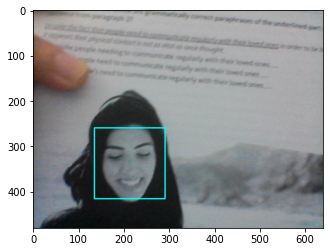

In [52]:
# display the original pic
image_show = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image_show)
plt.show()

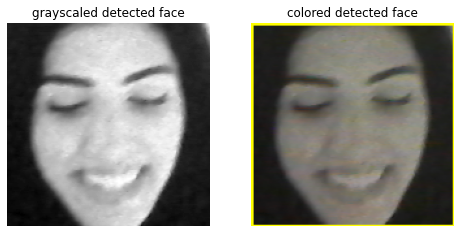

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(roi_gray, cmap=plt.cm.gray)
ax1.set_title('grayscaled detected face')

ax2.axis('off')
ax2.imshow(roi_color)
ax2.set_title('colored detected face')
plt.show()

In [65]:
print(roi_color.shape)

(156, 156, 3)


In [66]:
resized_image = cv2.resize(roi_color, (256, 256))
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)
final_image = gray_image.reshape((256, 256, 1))
print(final_image.shape)

(256, 256)
(256, 256, 1)


In [67]:
expanded_image = np.expand_dims(final_image, axis=0)
print(expanded_image.shape)

(1, 256, 256, 1)


In [69]:
# save image
status = cv2.imwrite('./test_image_folder/test/test_image.png', roi_color)

In [70]:
test_image_dir = './test_image_folder'

In [71]:
batch_size = 8
target_size = (256, 256)  # Adjust the target size according to your requirements
color_mode = 'grayscale'
class_mode = 'binary'

train_data_generator = ImageDataGenerator(rescale=1.0 / 255)
valid_data_generator = ImageDataGenerator(rescale=1.0 / 255)

test_image_generator = train_data_generator.flow_from_directory(
    test_image_dir,
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode=class_mode
)

Found 1 images belonging to 1 classes.


In [68]:
predictions = loaded_model.predict(expanded_image)
print(predictions)

1/1 [==============================] - 0s 80ms/step
[[1.]]


In [72]:
predictions = loaded_model.predict(test_image_generator)
print(predictions)

1/1 [==============================] - 0s 155ms/step
[[0.97275317]]
